<a href="https://colab.research.google.com/github/JAgrit20/Thesis_Codes/blob/main/RQ1_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-ddc893b342b5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedback_comments['Comment Text'] = feedback_comments['Comment Text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True).str.lower()
<ipython-input-3-ddc893b342b5>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_feedback['Sentiment'] = filtered_feedback['Comment Text'].apply(classify_sentiment)


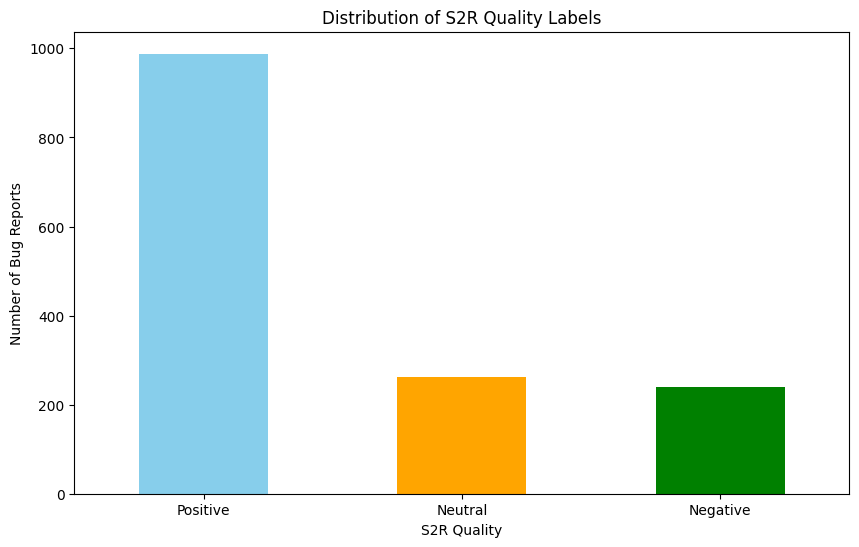

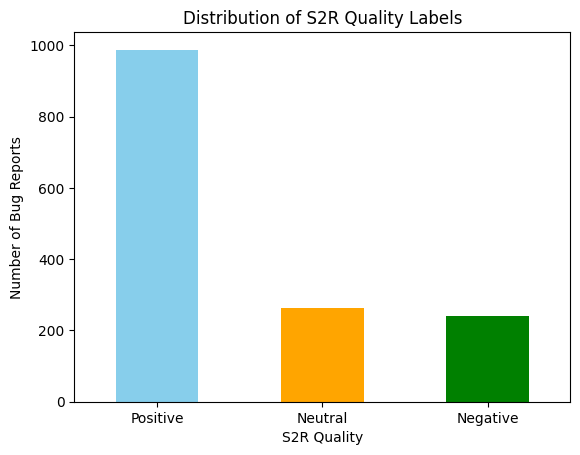

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'bug_comments.csv'
bug_comments_df = pd.read_csv(file_path)

# Fill missing values in 'Comment Text' with an empty string
bug_comments_df['Comment Text'] = bug_comments_df['Comment Text'].fillna('')

# Relaxed function to check if a comment is an S2R comment by only checking "steps to reproduce"
def is_s2r_comment(text):
    return "steps to reproduce" in text.lower()

# Apply the function to identify S2R comments
s2r_comments = bug_comments_df[bug_comments_df['Comment Text'].apply(is_s2r_comment)]

# Extract feedback comments for each S2R comment based on Bug ID
feedback_comments = bug_comments_df[bug_comments_df['Bug ID'].isin(s2r_comments['Bug ID']) & ~bug_comments_df.index.isin(s2r_comments.index)]

# Preprocess the feedback comments: remove special characters, convert to lowercase
feedback_comments['Comment Text'] = feedback_comments['Comment Text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True).str.lower()

# Apply keyword filtering to feedback comments
keywords = ["steps to reproduce", "reproduce", "follow steps", "steps unclear", "steps not working", "instructions unclear", "cannot reproduce", "s2r", "steps"]
filtered_feedback = feedback_comments[feedback_comments['Comment Text'].str.contains('|'.join(keywords))]

# Function to classify sentiment
def classify_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the filtered feedback comments
filtered_feedback['Sentiment'] = filtered_feedback['Comment Text'].apply(classify_sentiment)

# Aggregate sentiment results to assign S2R quality label for each bug report
s2r_quality = filtered_feedback.groupby('Bug ID')['Sentiment'].agg(lambda x: x.value_counts().idxmax()).reset_index()
s2r_quality.columns = ['Bug ID', 'S2R Quality']

# Save the resulting dataset to a CSV file
s2r_quality_file_path = 's2r_quality_analysis.csv'
s2r_quality.to_csv(s2r_quality_file_path, index=False)

# Generate graphs to visualize the distribution of S2R quality
# Count the occurrences of each S2R Quality label
s2r_quality_counts = s2r_quality['S2R Quality'].value_counts()

# Plot the distribution of S2R Quality labels
plt.figure(figsize=(10, 6))
s2r_quality_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Distribution of S2R Quality Labels')
plt.xlabel('S2R Quality')
plt.ylabel('Number of Bug Reports')
plt.xticks(rotation=0)
plt.show()

# Display the bar plot
s2r_quality_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'], title='Distribution of S2R Quality Labels', xlabel='S2R Quality', ylabel='Number of Bug Reports')
plt.xticks(rotation=0)
plt.show()


<ipython-input-5-9c014bfc1309>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedback_comments['Comment Text'] = feedback_comments['Comment Text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True).str.lower()
<ipython-input-5-9c014bfc1309>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_feedback[['Sentiment', 'Polarity']] = filtered_feedback['Comment Text'].apply(lambda text: pd.Series(classify_sentiment(text)))
<ipython-input-5-9c014bfc1309>:41: SettingWithCopyWarning: 
A value is trying to be s

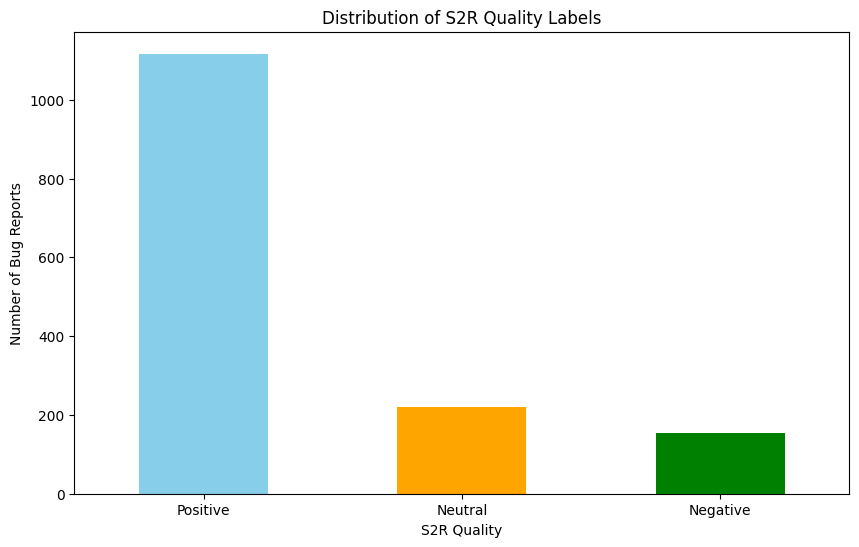

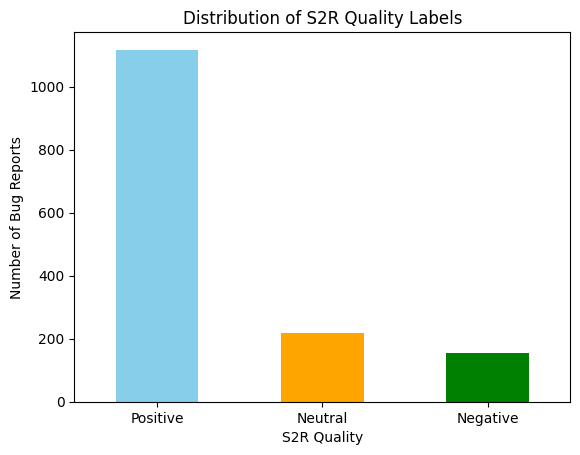

In [5]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'bug_comments.csv'
bug_comments_df = pd.read_csv(file_path)

# Fill missing values in 'Comment Text' with an empty string
bug_comments_df['Comment Text'] = bug_comments_df['Comment Text'].fillna('')

# Relaxed function to check if a comment is an S2R comment by only checking "steps to reproduce"
def is_s2r_comment(text):
    return "steps to reproduce" in text.lower()

# Apply the function to identify S2R comments
s2r_comments = bug_comments_df[bug_comments_df['Comment Text'].apply(is_s2r_comment)]

# Extract feedback comments for each S2R comment based on Bug ID
feedback_comments = bug_comments_df[bug_comments_df['Bug ID'].isin(s2r_comments['Bug ID']) & ~bug_comments_df.index.isin(s2r_comments.index)]

# Preprocess the feedback comments: remove special characters, convert to lowercase
feedback_comments['Comment Text'] = feedback_comments['Comment Text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True).str.lower()

# Apply keyword filtering to feedback comments
keywords = ["steps to reproduce", "reproduce", "follow steps", "steps unclear", "steps not working", "instructions unclear", "cannot reproduce", "s2r", "steps"]
filtered_feedback = feedback_comments[feedback_comments['Comment Text'].str.contains('|'.join(keywords))]

# Function to classify sentiment and get polarity
def classify_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive', polarity
    elif polarity == 0:
        return 'Neutral', polarity
    else:
        return 'Negative', polarity

# Apply sentiment analysis to the filtered feedback comments
filtered_feedback[['Sentiment', 'Polarity']] = filtered_feedback['Comment Text'].apply(lambda text: pd.Series(classify_sentiment(text)))

# Aggregate sentiment results to assign S2R quality label for each bug report
s2r_quality = filtered_feedback.groupby('Bug ID').apply(lambda x: x.loc[x['Polarity'].idxmax()]).reset_index(drop=True)

# Save the resulting dataset to a CSV file
s2r_quality_file_path = 's2r_quality_analysis_with_scores.csv'
s2r_quality.to_csv(s2r_quality_file_path, index=False)

# Generate graphs to visualize the distribution of S2R quality
# Count the occurrences of each S2R Quality label
s2r_quality_counts = s2r_quality['Sentiment'].value_counts()

# Plot the distribution of S2R Quality labels
plt.figure(figsize=(10, 6))
s2r_quality_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Distribution of S2R Quality Labels')
plt.xlabel('S2R Quality')
plt.ylabel('Number of Bug Reports')
plt.xticks(rotation=0)
plt.show()

# Display the bar plot
s2r_quality_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'], title='Distribution of S2R Quality Labels', xlabel='S2R Quality', ylabel='Number of Bug Reports')
plt.xticks(rotation=0)
plt.show()
